In [20]:
import pandas as pd
import seaborn as sns

In [31]:
puro_err_corr_summed = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/err_corr_100/activity_summed.csv")
puro_err_corr_summed

,AD,rep,0,4,24,48
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,1,NaN,NaN,inf,NaN
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2,NaN,0.215686,0.460526,0.321534
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3,NaN,0.000000,NaN,NaN
3,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,4,NaN,NaN,0.000000,0.000000
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,1,0.180556,0.364800,1.431957,inf
...,...,...,...,...,...,...
863,TTCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4,2.705882,0.527529,0.862641,0.557848
864,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,inf,0.394180,1.166309,inf
865,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,2,0.234259,0.428194,1.620993,1.058717
866,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,3,7.611111,1.057778,1.151529,0.574423


In [32]:
puro_err_corr_mean = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/NKX2-2/TL4B2/puro_only/err_corr_100/activity_mean.csv")
puro_err_corr_mean

,AD,rep,0,4,24,48
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,1,NaN,NaN,inf,NaN
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2,NaN,0.215686,0.460526,0.321534
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3,NaN,0.000000,NaN,NaN
3,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,4,NaN,NaN,0.000000,0.000000
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,1,inf,0.203936,1.431957,inf
...,...,...,...,...,...,...
863,TTCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4,inf,inf,inf,0.684827
864,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,inf,0.266264,1.239810,inf
865,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,2,inf,inf,inf,inf
866,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,3,inf,inf,inf,0.493463


/tmp/ipykernel_1120027/123501956.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  summed_values = puro_err_corr_summed.loc[idx, time_points].replace([np.inf, -np.inf], np.nan)
/tmp/ipykernel_1120027/123501956.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_values = puro_err_corr_mean.loc[idx, time_points].replace([np.inf, -np.inf], np.nan)
/tmp/ipykernel_1120027/123501956.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicit

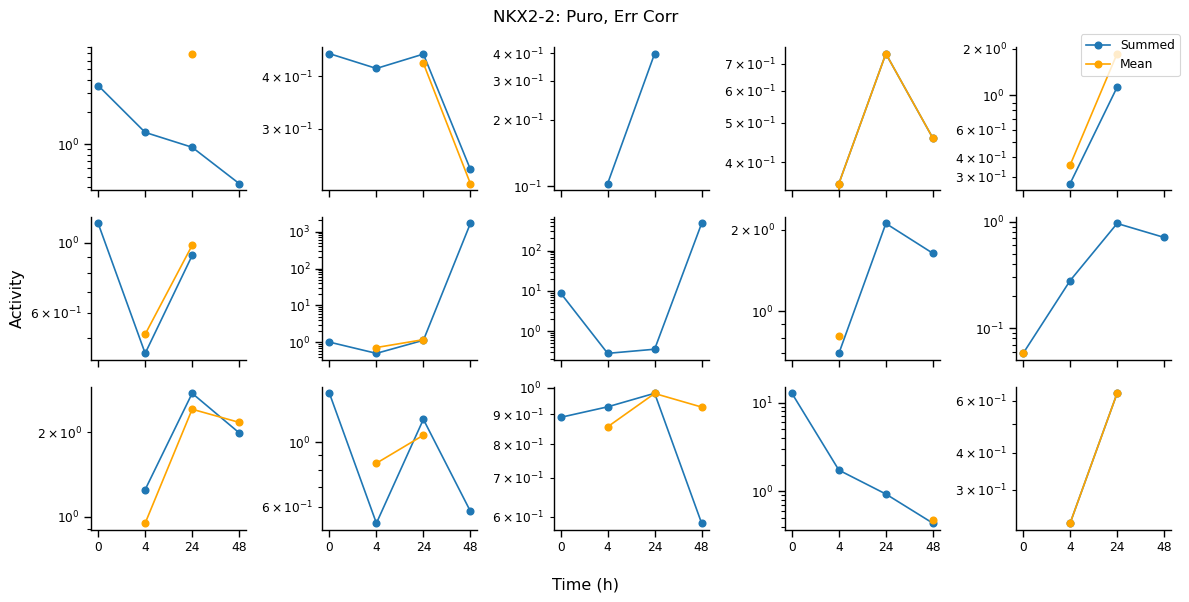

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_context('paper')

# Randomly pick 15 indices
np.random.seed(7)  # for reproducibility
random_indices = np.random.choice(puro_err_corr_summed.index, size=15, replace=False)

# Create subplots
fig, axes = plt.subplots(3,5, figsize=(12, 6), sharex=True)
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    seq_id = puro_err_corr_summed.loc[idx, 'rep']
    
    summed_values = puro_err_corr_summed.loc[idx, time_points].replace([np.inf, -np.inf], np.nan)
    mean_values = puro_err_corr_mean.loc[idx, time_points].replace([np.inf, -np.inf], np.nan)
    
    # Plot summed and mean with labels for legend
    axes[i].plot(time_points, summed_values, marker='o', label='Summed')
    axes[i].plot(time_points, mean_values, marker='o', color='orange', label='Mean')

# Set y-axis to log scale for all subplots
for ax in axes:
    ax.set_yscale('log')

sns.despine()

fig.supylabel("Activity")
fig.supxlabel("Time (h)")
fig.suptitle("NKX2-2: Puro, Err Corr", fontsize=12)

# Add a single legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 0.95))

plt.tight_layout()
plt.show()

# Comparing variation across technical replicates

In [98]:
time_points = [str(_) for _ in [0, 4, 24, 48]]


In [99]:
# Replace inf with NaN so they are ignored in std calculation
summed_clean = puro_err_corr_summed.replace([np.inf, -np.inf], np.nan)
mean_clean = puro_err_corr_mean.replace([np.inf, -np.inf], np.nan)

In [100]:
# Group by AD sequence (assuming column name is 'AD')
summed_std = summed_clean.groupby('AD')[time_points].std()
summed_std

,0,4,24,48
AD,,,,
ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGATGGGCGCCGACAGAATCAAGGAGGCTCCCGAGGCCGCCGCCGGCCAGAACGAGGCCGACGCCATGACCGACGCCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGC,NaN,0.152513,0.325641,0.227359
ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGATGGGCATCGACAGAATCAAGGAGATTCCCGAGATCTGGATCGGCCAGAACGAGTTCGACTTCATGACCGACTTCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGC,NaN,5.369105,0.208959,40.704445
ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGATGGGCCTGGACAGAATCAAGAAGCTGCCCAAGCTGTGGCTGGGCCAGAACAAGTTCAAGTTCATGACCAAGGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC,6.449318,0.142206,0.084448,0.080078
ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGATGGGCCTGGACAGAATCAAGGAGCTGCCCGAGCTGTGGCTGGGCCAGAACGAGTTCGACTTCATGACCGACTTCGGCAGCGGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC,2.779801,0.763824,0.464160,0.371359
ACCGACTTCATCGACGAGGAGGTGTTCATGAGCTTCGTGATCGAGATGGGCTTCGACAGAATCAAGGAGTTTCCCGAGTTCTGGTTCGGCCAGAACGAGTTCGACTTCATGACCGACGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC,3.171633,0.111183,0.136815,0.042675
...,...,...,...,...
TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAG,1.296362,0.339287,0.313453,0.039347
TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATG,NaN,2.956948,1.759159,2.899138
TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAG,NaN,0.255142,0.358111,0.036496


In [101]:
mean_std = mean_clean.groupby('AD')[time_points].std()
mean_std

,0,4,24,48
AD,,,,
ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGATGGGCGCCGACAGAATCAAGGAGGCTCCCGAGGCCGCCGCCGGCCAGAACGAGGCCGACGCCATGACCGACGCCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGC,NaN,0.152513,0.325641,0.227359
ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGATGGGCATCGACAGAATCAAGGAGATTCCCGAGATCTGGATCGGCCAGAACGAGTTCGACTTCATGACCGACTTCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGC,NaN,6.141312,0.243174,40.701190
ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGATGGGCCTGGACAGAATCAAGAAGCTGCCCAAGCTGTGGCTGGGCCAGAACAAGTTCAAGTTCATGACCAAGGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC,NaN,1.088052,0.135327,0.124974
ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGATGGGCCTGGACAGAATCAAGGAGCTGCCCGAGCTGTGGCTGGGCCAGAACGAGTTCGACTTCATGACCGACTTCGGCAGCGGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC,NaN,0.137566,0.457897,0.240296
ACCGACTTCATCGACGAGGAGGTGTTCATGAGCTTCGTGATCGAGATGGGCTTCGACAGAATCAAGGAGTTTCCCGAGTTCTGGTTCGGCCAGAACGAGTTCGACTTCATGACCGACGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC,NaN,NaN,0.155880,0.034713
...,...,...,...,...
TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAG,1.296362,0.339287,0.313453,0.039347
TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATG,NaN,2.956948,1.759159,2.899138
TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGGCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAG,NaN,0.255142,0.421385,0.120621


In [102]:
# Reset index to make 'AD' a column
summed_std_reset = summed_std.reset_index()
mean_std_reset = mean_std.reset_index()

# Melt both dataframes to long format
summed_long = summed_std_reset.melt(id_vars='AD', value_vars=time_points,
                                    var_name='Time', value_name='Summed_SD')
mean_long = mean_std_reset.melt(id_vars='AD', value_vars=time_points,
                                var_name='Time', value_name='Mean_SD')

# Merge on AD and Time
sd_merged = pd.merge(summed_long, mean_long, on=['AD', 'Time']).dropna()
sd_merged

,AD,Time,Summed_SD,Mean_SD
11,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,0,4.481047,4.481047
15,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGGCCCAGG...,0,18.108513,2.058664
16,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGGCCCAGG...,0,1.145689,1.362007
17,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCA...,0,0.582885,0.635918
30,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,0,0.297729,0.297729
...,...,...,...,...
898,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,48,0.604022,0.283759
899,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,48,0.039347,0.039347
900,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGG...,48,2.899138,2.899138
901,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGG...,48,0.036496,0.120621


In [103]:
sd_merged.sort_values(by = "Summed_SD")

,AD,Time,Summed_SD,Mean_SD
328,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4,0.000000,0.000000
379,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4,0.000000,0.000000
42,GCCCAGAAGCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,0,0.000000,0.000000
599,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,24,0.004769,0.004769
759,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCGCCA...,48,0.005281,0.091662
...,...,...,...,...
741,GCCCAGGACCTGGCCGCCGCCACCGCCCAGGCCGGCATTCCCGCCA...,48,921.905426,0.096275
884,GCCCAGGAGCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,48,937.648175,0.214704
893,GCTCCCGACCTGGCCGCCGCCACCTTTCCCGCCGGCATTCCCTTCA...,48,1095.133278,0.116131
783,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,48,1300.884950,0.131177


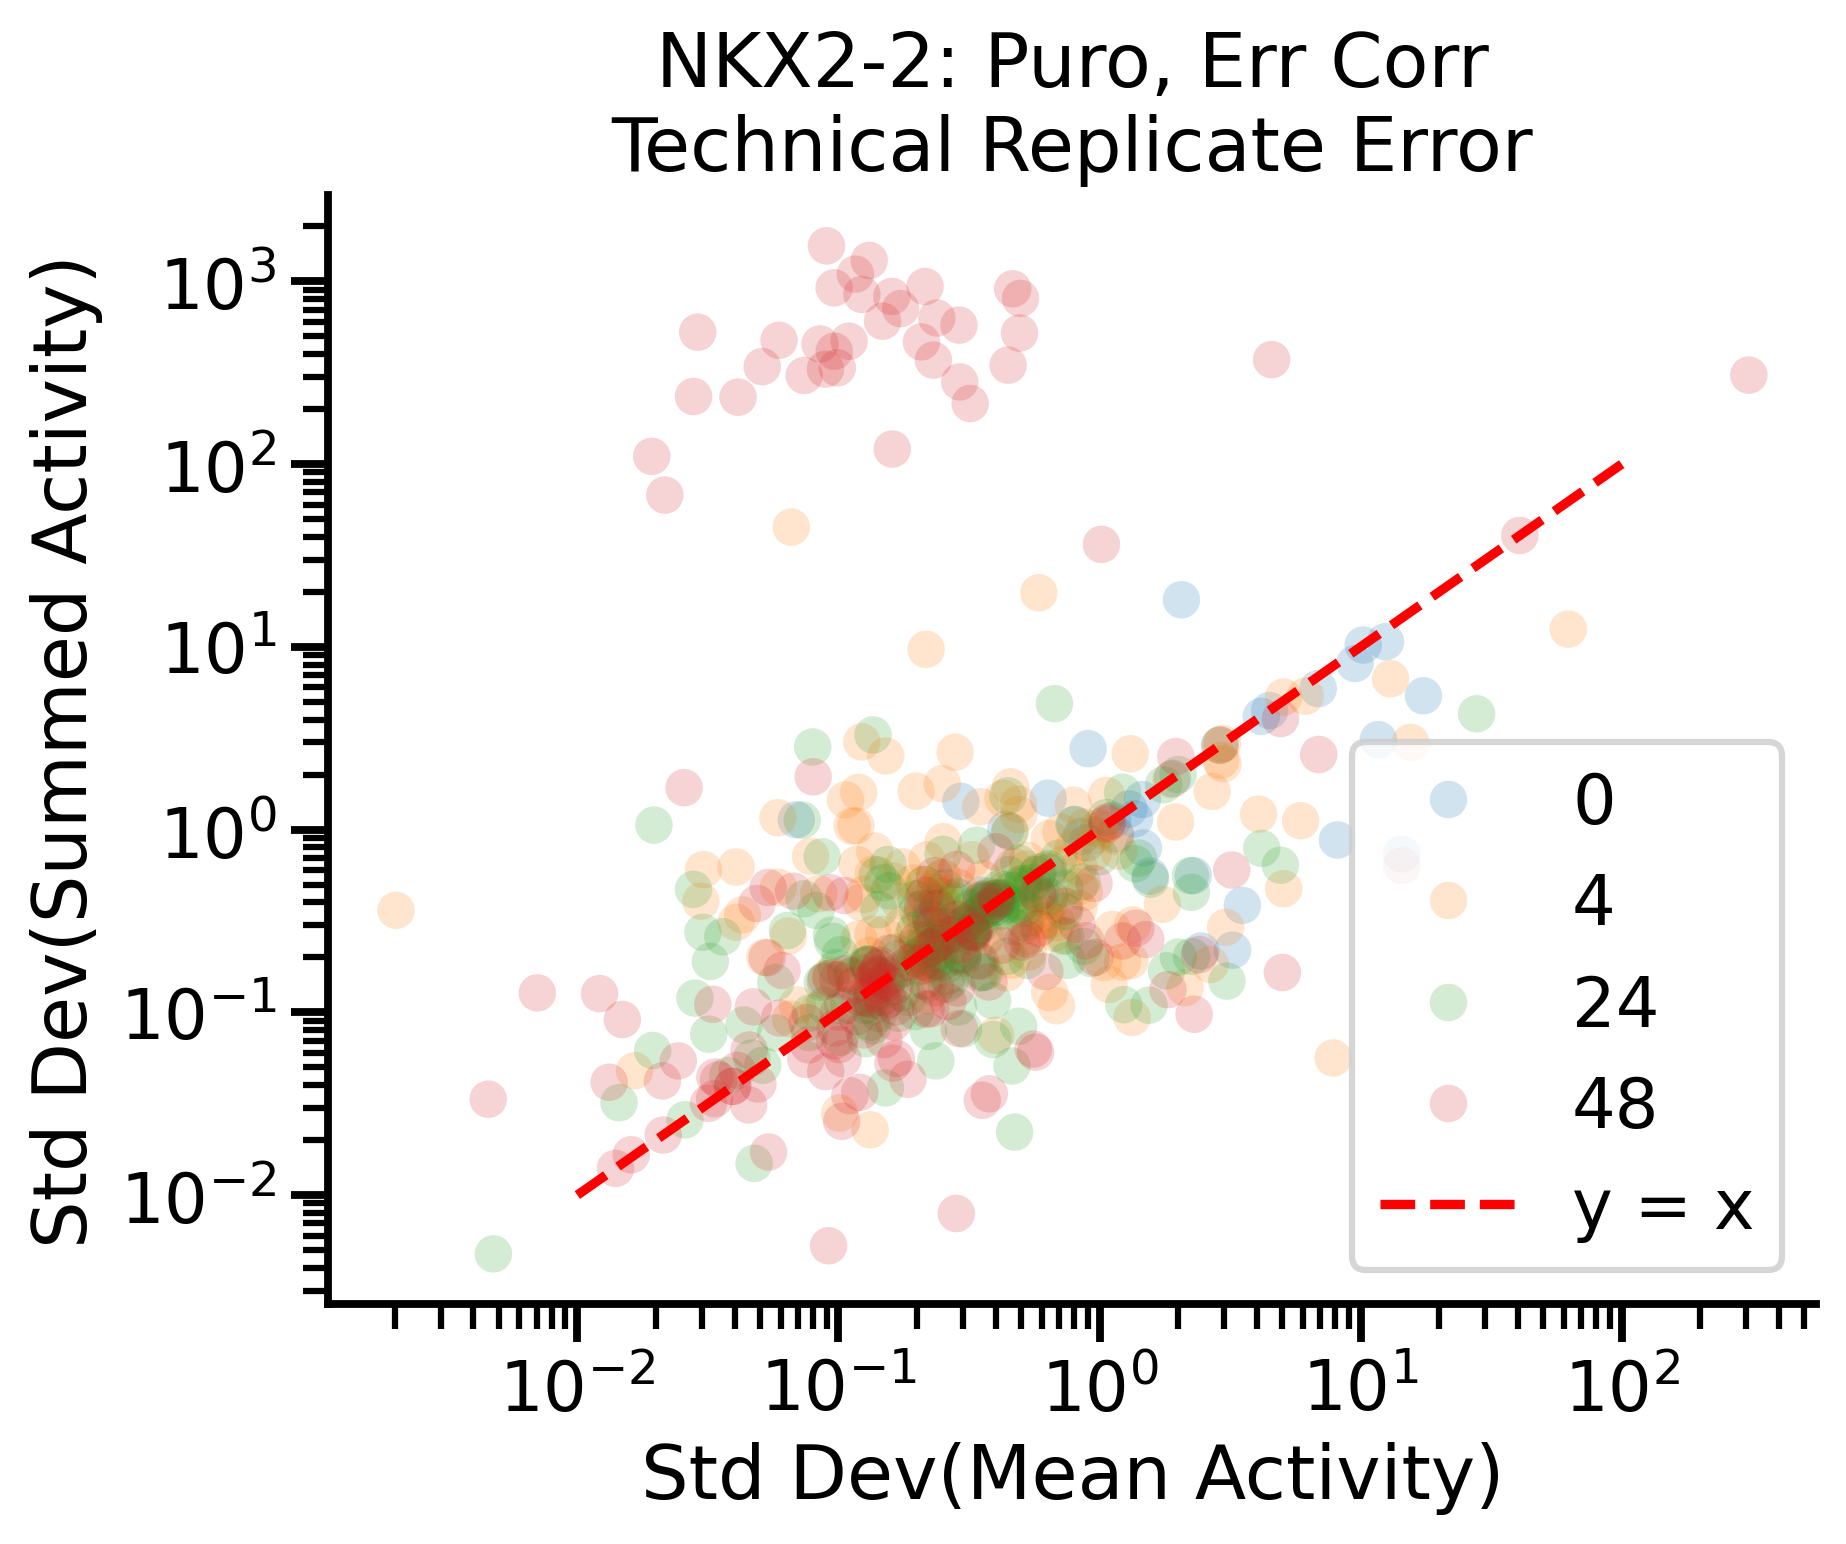

In [104]:
sns.set_context('talk')
plt.figure(dpi = 300)
# Add y = x line
ax = sns.scatterplot(data=sd_merged, x="Mean_SD", y="Summed_SD", hue="Time", alpha=0.2, edgecolor='none')
ax.set_xscale('log')
ax.set_yscale('log')

# Plot y = x line
ax.plot([1e-2, 1e2], [1e-2, 1e2], color='red', linestyle='--', label='y = x')

# Add legend
ax.legend()
plt.title("NKX2-2: Puro, Err Corr\nTechnical Replicate Error")
plt.xlabel("Std Dev(Mean Activity)")
plt.ylabel("Std Dev(Summed Activity)")
sns.despine()

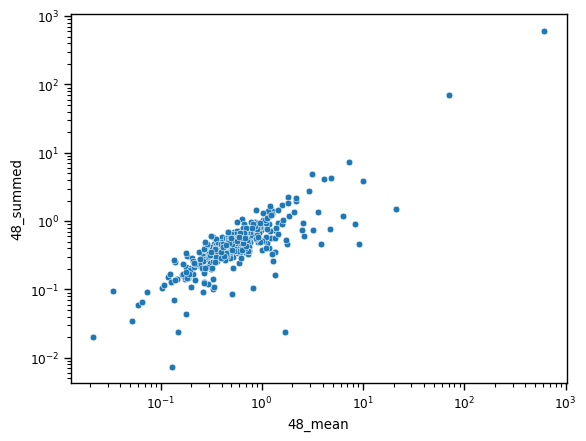

In [ ]:
# mean and summed have similar activities
merged_48_hr = pd.merge(puro_err_corr_summed, puro_err_corr_mean, on=["AD", "rep"], suffixes=("_summed", "_mean"))[["AD", "48_summed", "48_mean", "rep"]]
ax = sns.scatterplot(data = merged_48_hr, x= "48_mean", y = "48_summed")
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
# high 48 hour summedj errors seem to be cases where mean is inf
merged_48_hr[merged_48_hr["AD"] == "GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCGCCCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCGCCCATCCCGCCGTGCAGGCCCAGCAGTGGACCTGG"]

,AD,48_summed,48_mean,rep
786,GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,3128.461538,inf,1
787,GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,0.669916,0.612063,2
788,GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,0.572588,0.481970,3
789,GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,0.486337,0.654743,4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time points

# Replace inf with NaN so it doesn't mess with stats
summed_df = puro_err_corr_summed[time_points].replace([np.inf, -np.inf], np.nan)
mean_df = puro_err_corr_mean[time_points].replace([np.inf, -np.inf], np.nan)

# Compute replicate-wise standard deviation
summed_sd = summed_df.groupby(puro_err_corr_summed['rep']).std()
mean_sd = mean_df.groupby(puro_err_corr_mean['rep']).std()

# Compute replicate-wise mean (optional, for plotting)
summed_mean = summed_df.groupby(puro_err_corr_summed['rep']).mean()
mean_mean = mean_df.groupby(puro_err_corr_mean['rep']).mean()

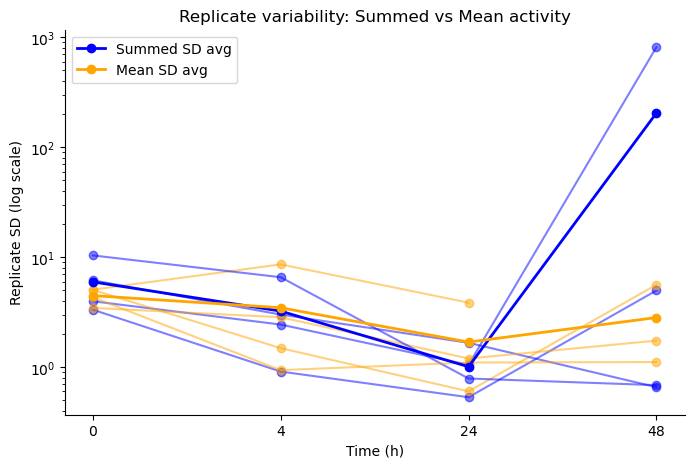

In [46]:
fig, ax = plt.subplots(figsize=(8,5))

rep_labels = summed_sd.index.astype(str)

# Plot SD for summed vs mean
for rep in rep_labels:
    ax.plot(time_points, summed_sd.loc[int(rep)], marker='o', color='blue', alpha=0.5)
    ax.plot(time_points, mean_sd.loc[int(rep)], marker='o', color='orange', alpha=0.5)

# Add average SD across replicates as thicker line
ax.plot(time_points, summed_sd.mean(), marker='o', color='blue', linewidth=2, label='Summed SD avg')
ax.plot(time_points, mean_sd.mean(), marker='o', color='orange', linewidth=2, label='Mean SD avg')

ax.set_yscale('log')
ax.set_xlabel("Time (h)")
ax.set_ylabel("Replicate SD (log scale)")
ax.set_title("Replicate variability: Summed vs Mean activity")
ax.legend()
sns.despine()
plt.show()